In [1]:
print("Hello, worlds")

Hello, worlds


In [66]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np  # Matrix and vector computation package
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
from matplotlib import cm # Colormaps
from matplotlib.colors import colorConverter, ListedColormap
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D  # 3D plots
import seaborn as sns  # Fancier plots

# Set seaborn plotting style
sns.set_style('darkgrid')
# Set the seed for reproducability
np.random.seed(seed=42)
#


In [67]:
nb_of_samples_per_class = 20
blue_mean = 0
red_left_mean = -2
red_right_mean = 2

std_dev = 0.5

In [68]:
xs_blue = np.random.randn(nb_of_samples_per_class, 1)*std_dev + blue_mean

In [69]:
rl_p1 = np.random.randn(nb_of_samples_per_class//2, 1)*std_dev + red_left_mean
rl_p2 = np.random.randn(nb_of_samples_per_class//2, 1)*std_dev + red_right_mean

xs_red = np.vstack((rl_p1, rl_p2))

In [70]:
features = np.vstack((xs_red, xs_blue))
target = np.vstack((
    np.zeros((nb_of_samples_per_class, 1)),
    np.ones((nb_of_samples_per_class, 1))
))

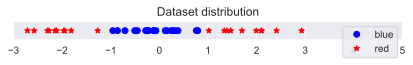

In [71]:
fig = plt.figure(figsize=(7, 1))
plt.xlim(-3, 5)
plt.ylim(-1, 1)

plt.plot(xs_blue, np.zeros_like(xs_blue), 'bo', label="blue")
plt.plot(xs_red, np.zeros_like(xs_red), 'r*', label="red")
plt.title("Dataset distribution")
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()
fig.subplots_adjust(bottom=0.5, top=0.75)

plt.show()

In [114]:
def rbs(zh):
    return np.exp(-zh**2)

In [90]:
ws = np.linspace(-4, 4, 100)

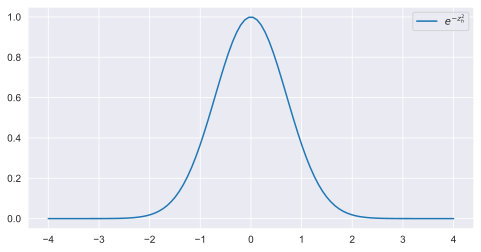

In [91]:
plt.figure(figsize=(8, 4))
plt.plot(ws, rbs(ws), label="$e^{-z^2_h}$")
plt.legend()
plt.show()

In [92]:
def logistic(x):
    return 1./(1.0 + np.exp(-x))

In [115]:
def hidden_activation(x, wh):
    return rbs(x * wh)

In [116]:
def output_activations(h, bo):
    return logistic(h + bo)

In [117]:
def nn(x, wh, bo):
    return output_activations(hidden_activation(x, wh), bo)

In [118]:
def nn_predict(x, wh, bo):
    return np.around(nn(x, wh, bo))

In [122]:
def loss(y, t):
    return -np.mean(
        (t * np.log(y)) + (1-t)*np.log(1-y)
    )
    

In [123]:
def loss_for_param(x, wh, bo, t):
    return loss(nn(x, wh, bo), t)

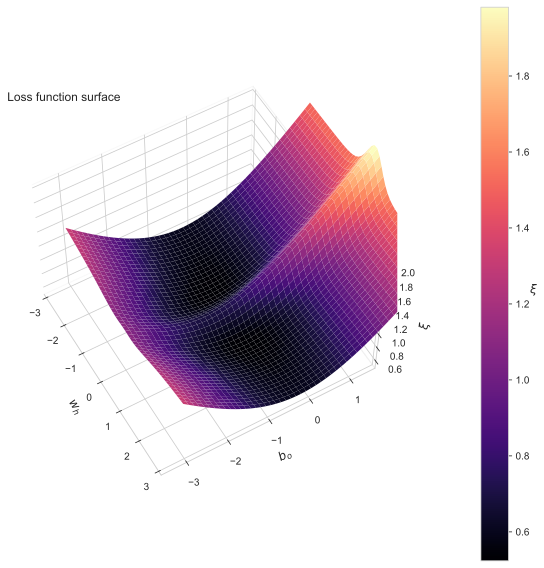

In [127]:
grid_size = 50
wsh = np.linspace(-3, 3, num=grid_size)
bso = np.linspace(-3, 3, num=grid_size)

params_x, params_y = np.meshgrid(wsh, bso)
loss_grid = np.zeros((grid_size, grid_size))

for i in range(grid_size):
    for j in range(grid_size):
        loss_grid[i,j] = loss(nn(features, params_x[i,j], params_y[i,j]), target)


fig = plt.figure(figsize=(10, 10))
with sns.axes_style("whitegrid"):
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    surf = ax.plot_surface(params_x, params_y, loss_grid, linewidth=0, cmap=cm.magma)

    ax.view_init(elev=55, azim=-30)
    ax.view_init(elev=55, azim=-30)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    cbar = fig.colorbar(surf, pad=0.15)

    ax.set_xlabel('$w_h$', fontsize=12)
    ax.set_ylabel('$b_o$', fontsize=12)
    ax.set_zlabel('$\\xi$', fontsize=12)
    ax.set_ylim(-3.5, 1.5)
    ax.set_xlim(-3, 3)
    cbar.ax.set_ylabel('$\\xi$', fontsize=12, rotation=0)
    ax.set_title('Loss function surface', loc='left', y=1.0, pad=-12)
plt.show()



In [128]:
def gradient_output(y, t):
    """Gradient of loss output."""
    return y - t


def gradient_bias_out(grad_output): 
    """Gradient off the bias parameter at the output layer."""
    return grad_output


def gradient_hidden(grad_output):
    """Gradient of hidden layer output."""
    return grad_output


def gradient_weight_hidden(x, zh, h, grad_hidden):
    """Gradient of hidden layer weight parameter wh."""
    return x * -2 * zh * h * grad_hidden
